In [2]:
import numpy 
import cv2

import PIL.Image as Image
import matplotlib.pylab as plt

import os
import tensorflow as tf
import tensorflow_hub as hub
  
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
    


In [3]:
classifier=tf.keras.Sequential([hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2")
])

Attaching model 'google/mobilenet-v2/tensorflow2/035-128-classification/2' to your Kaggle notebook...


In [4]:
IMAGESHAPE=(128,128)

In [5]:
import pathlib
data_dir = pathlib.Path("/kaggle/input/vegetable-image-dataset/Vegetable Images/train")

In [6]:
data_dir


PosixPath('/kaggle/input/vegetable-image-dataset/Vegetable Images/train')

In [7]:
len(list(data_dir.glob('*/*.jpg')))

15000

In [8]:
vegetables_path_dict={
    
    'bittergourd':list(data_dir.glob('Bitter_Gourd/*')),
    'bottlegourd':list(data_dir.glob('Bottle_Gourd/*')),
    'brinjal':list(data_dir.glob('Brinjal/*')),
    'Broccoli':list(data_dir.glob('Broccoli/*')),
    'Cabbage':list(data_dir.glob('Cabbage/*')),
    'Capsicum':list(data_dir.glob('Capsicum/*')),
    'Carrot':list(data_dir.glob('Carrot/*')),
    'Cauliflower':list(data_dir.glob('Cauliflower/*')),
    'Cucumber':list(data_dir.glob('Cucumber/*')),
    'Papaya':list(data_dir.glob('Papaya/*')),
    'Potato':list(data_dir.glob('Potato/*')),
    'Pumpkin':list(data_dir.glob('Pumpkin/*')),
    'Radish':list(data_dir.glob('Radish/*')),
    'Tomato':list(data_dir.glob('Tomato/*')),
    'beans':list(data_dir.glob('Bean/*')),
    
    
}

In [9]:
vegetables_labels_dict={ 
    'bittergourd':0,
    'bottlegourd':1,
    'brinjal':2,
    'Broccoli':3,
    'Cabbage':4,
    'Capsicum':5,
    'Carrot':6,
    'Cauliflower':7,
    'Cucumber':8,
    'Papaya':9,
    'Potato':10,
    'Pumpkin':11,
    'Radish':12,
    'Tomato':13,
    'beans':14,                   
    
}

In [10]:
str(vegetables_path_dict['bittergourd'][0])

'/kaggle/input/vegetable-image-dataset/Vegetable Images/train/Bitter_Gourd/0664.jpg'

In [11]:
img=cv2.imread(str(vegetables_path_dict['bittergourd'][0]))
img.shape

(224, 224, 3)

In [12]:
cv2.resize(img,IMAGESHAPE).shape

(128, 128, 3)

In [13]:
X=[]
y=[]

for types,images in vegetables_path_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_image=cv2.resize(img,IMAGESHAPE)
        X.append(resized_image)
        y.append(vegetables_labels_dict[types])

        
        

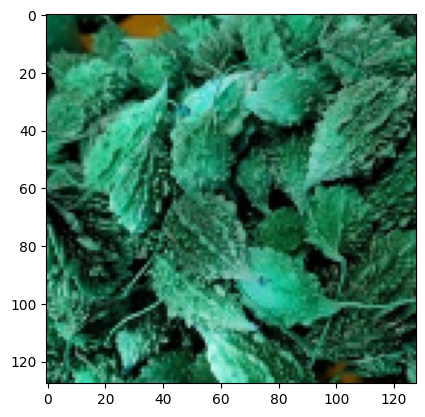

In [14]:
plt.imshow(X[0])

In [15]:
X=numpy.array(X)
y=numpy.array(y)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [17]:
X_train_scaled=X_train/255.0
X_test_scaled=X_test/255.0

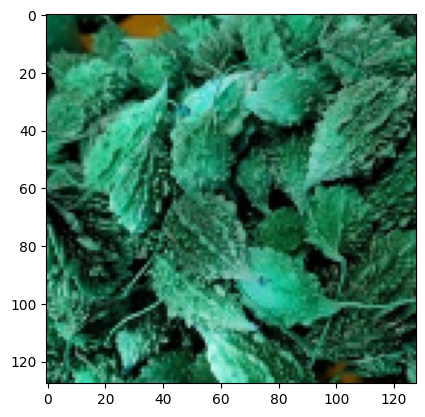

In [18]:
plt.imshow(X[0])

In [19]:
model2 = tf.keras.Sequential([
    hub.KerasLayer("https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-feature-vector/versions/2",
                   trainable=False), 
    tf.keras.layers.Dense(15, activation='softmax')
])
 # Batch input shape.


Attaching model 'google/mobilenet-v2/tensorflow2/035-128-feature-vector/2' to your Kaggle notebook...


In [20]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.fit(X_train_scaled,y_train,epochs=2)

Epoch 1/2


/opt/conda/lib/python3.10/site-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


352/352 [==============================] - 36s 80ms/step - loss: 0.3558 - accuracy: 0.9091
Epoch 2/2
352/352 [==============================] - 25s 71ms/step - loss: 0.0697 - accuracy: 0.9870


In [21]:
model2.evaluate(X_test_scaled,y_test)

118/118 [==============================] - 9s 68ms/step - loss: 0.0632 - accuracy: 0.9877


[0.06322189420461655, 0.9877333045005798]

In [22]:
vege=X[10]
vege[numpy.newaxis,...].shape

(1, 128, 128, 3)

1/1 [==============================] - 1s 595ms/step


array([[4.68060421e-03, 9.69619759e-06, 3.80859536e-04, 4.58930898e-03,
        5.23394010e-06, 9.26494522e-06, 1.18963624e-04, 3.15917423e-05,
        4.23243822e-04, 2.23541487e-04, 9.57981276e-04, 2.75133189e-05,
        3.09391636e-02, 9.52438176e-01, 5.16490126e-03]], dtype=float32)

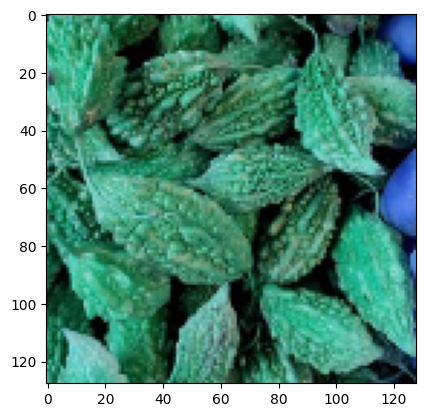

In [23]:
plt.imshow(X[10])

model2.predict(vege[numpy.newaxis,...])


In [24]:
im=Image.open('/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Bitter_Gourd/1001.jpg')
img=cv2.imread("/kaggle/input/vegetable-image-dataset/Vegetable Images/validation/Bitter_Gourd/1001.jpg")
img1=cv2.resize(img,IMAGESHAPE)
img1=numpy.array(img1)
img1.shape
img1=img1/255.0
img1

array([[[0.52941176, 0.60784314, 0.67843137],
        [0.63921569, 0.70980392, 0.78039216],
        [0.63137255, 0.69411765, 0.75686275],
        ...,
        [0.76078431, 0.80784314, 0.85490196],
        [0.79215686, 0.83921569, 0.88627451],
        [0.80392157, 0.85882353, 0.90588235]],

       [[0.65882353, 0.72941176, 0.79607843],
        [0.69411765, 0.76470588, 0.83137255],
        [0.55686275, 0.61960784, 0.68235294],
        ...,
        [0.63921569, 0.68627451, 0.7372549 ],
        [0.63529412, 0.69019608, 0.7372549 ],
        [0.6627451 , 0.71764706, 0.76470588]],

       [[0.68235294, 0.75294118, 0.81960784],
        [0.54901961, 0.62352941, 0.68235294],
        [0.55294118, 0.61960784, 0.67843137],
        ...,
        [0.57254902, 0.63529412, 0.68627451],
        [0.54901961, 0.61176471, 0.65882353],
        [0.58039216, 0.63921569, 0.69019608]],

       ...,

       [[0.14117647, 0.33333333, 0.22745098],
        [0.17647059, 0.39607843, 0.28627451],
        [0.18823529, 0

In [25]:
img1[numpy.newaxis,...]

array([[[[0.52941176, 0.60784314, 0.67843137],
         [0.63921569, 0.70980392, 0.78039216],
         [0.63137255, 0.69411765, 0.75686275],
         ...,
         [0.76078431, 0.80784314, 0.85490196],
         [0.79215686, 0.83921569, 0.88627451],
         [0.80392157, 0.85882353, 0.90588235]],

        [[0.65882353, 0.72941176, 0.79607843],
         [0.69411765, 0.76470588, 0.83137255],
         [0.55686275, 0.61960784, 0.68235294],
         ...,
         [0.63921569, 0.68627451, 0.7372549 ],
         [0.63529412, 0.69019608, 0.7372549 ],
         [0.6627451 , 0.71764706, 0.76470588]],

        [[0.68235294, 0.75294118, 0.81960784],
         [0.54901961, 0.62352941, 0.68235294],
         [0.55294118, 0.61960784, 0.67843137],
         ...,
         [0.57254902, 0.63529412, 0.68627451],
         [0.54901961, 0.61176471, 0.65882353],
         [0.58039216, 0.63921569, 0.69019608]],

        ...,

        [[0.14117647, 0.33333333, 0.22745098],
         [0.17647059, 0.39607843, 0.28627451]

In [26]:
result=model2.predict(img1[numpy.newaxis,...])
numpy.argmax(result)

1/1 [==============================] - 1s 543ms/step


0

In [27]:
model2.save("vegetable_classifier.h5")

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
